In [76]:
%matplotlib inline
import numpy as np
import pylab as plt
import pandas as pd
from sklearn import svm
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

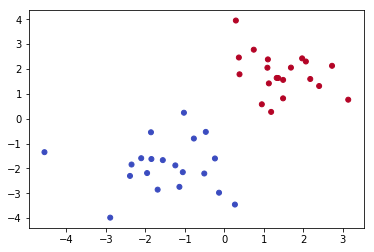

In [10]:
np.random.seed(0)
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
Y = [0] * 20 + [1] * 20
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.coolwarm, s=25)

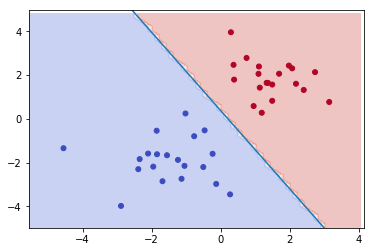

In [12]:
fig, ax = plt.subplots()
clf2 = svm.LinearSVC(C=1).fit(X, Y)

# get the separating hyperplane
w = clf2.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf2.intercept_[0]) / w[1]

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx2, yy2 = np.meshgrid(np.arange(x_min, x_max, .2),
                     np.arange(y_min, y_max, .2))
Z = clf2.predict(np.c_[xx2.ravel(), yy2.ravel()])

Z = Z.reshape(xx2.shape)
ax.contourf(xx2, yy2, Z, cmap=plt.cm.coolwarm, alpha=0.3)
ax.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.coolwarm, s=25)
ax.plot(xx,yy)

ax.axis([x_min, x_max,y_min, y_max])
plt.show()

**Supervised learning**:

  - Linear models (Ridge, Lasso, Elastic Net, ...)
  - Support Vector Machines
  - Tree-based methods (Random Forests, Bagging, GBRT, ...)
  - Nearest neighbors 
  - Neural networks (basics)

**Unsupervised learning**:

  - Clustering (KMeans, Ward, ...)
  - Outlier detection

## Accuracy and precision

1. precision: 
The fraction of relevant instances among the retrieved instances, 
1. recall:
The fraction of relevant instances that have been retrieved over the total amount of relevant instances. 
1. F-score


* The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

* The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

* The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0. The F-beta score weights recall more than precision by a factor of beta. beta == 1.0 means recall and precision are equally important.

* The support is the number of occurrences of each class in y_true.

Take a look at [HERE](https://en.wikipedia.org/wiki/F1_score) or [HERE](https://en.wikipedia.org/wiki/Precision_and_recall).

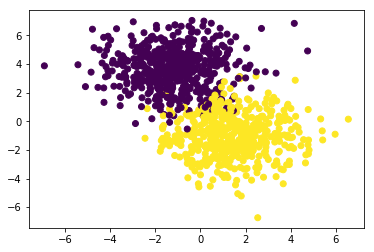

In [95]:
# Generate data
from sklearn.datasets import make_blobs,make_circles,make_moons
X, y = make_blobs(n_samples=1000, centers=2,
                  cluster_std=1.5,
                  center_box=(-4.0, 4.0))
# X, y = make_circles(n_samples=1000, noise=.05, factor=.5)
# X,Y = make_moons(n_samples=1000, noise=.05)

plt.scatter(X[:,0],X[:,1],c=y,)


In [96]:
print(X[:3]) 

[[ 1.02671977 -2.62883083]
 [ 2.11146527 -1.11283514]
 [ 1.37944148 -1.09866375]]


In [97]:
print(y[:3])

[1 1 1]


In [98]:
# X is a 2 dimensional array, with 1000 rows and 2 columns
print(X.shape)
 
# y is a vector of 1000 elements
print(y.shape)

(1000, 2)
(1000,)


In [99]:
X_train, y_train = X[:700], y[:700]
X_test, y_test = X[700:], y[700:]

## K-Nearest Neighbours

In [100]:
# K-Nearest Neighbours
from sklearn.neighbors import KNeighborsClassifier

Model = KNeighborsClassifier(n_neighbors=8)
Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score

print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       138
           1       0.97      0.96      0.96       162

   micro avg       0.96      0.96      0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300

[[133   5]
 [  7 155]]
accuracy is 0.96


In [101]:
# Compute (approximate) class probabilities
print(clf.predict_proba(X_test[:5]))

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]]


##  Radius Neighbors Classifier

In [102]:
from sklearn.neighbors import  RadiusNeighborsClassifier
Model=RadiusNeighborsClassifier(radius=8.0)
Model.fit(X_train,y_train)
y_pred=Model.predict(X_test)
#summary of the predictions made by the classifier
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
#Accouracy score
print('accuracy is ', accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.61      1.00      0.76       138
           1       1.00      0.46      0.63       162

   micro avg       0.71      0.71      0.71       300
   macro avg       0.81      0.73      0.70       300
weighted avg       0.82      0.71      0.69       300

[[138   0]
 [ 87  75]]
accuracy is  0.71


## Naive Bayes

\begin{align}\begin{aligned}P(y \mid x_1, \dots, x_n) \propto P(y) \prod_{i=1}^{n} P(x_i \mid y)\\\Downarrow\\\hat{y} = \arg\max_y P(y) \prod_{i=1}^{n} P(x_i \mid y),\end{aligned}\end{align}

In [90]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
Model = GaussianNB()
Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           b       0.98      0.99      0.99       159
           r       0.99      0.98      0.99       141

   micro avg       0.99      0.99      0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300

[[158   1]
 [  3 138]]
accuracy is 0.9866666666666667


## SVM

In [91]:
# Support Vector Machine
from sklearn.svm import SVC

Model = SVC()
Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score

print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           b       0.97      0.97      0.97       159
           r       0.97      0.97      0.97       141

   micro avg       0.97      0.97      0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300

[[155   4]
 [  4 137]]
accuracy is 0.9733333333333334


/home/gf/packages/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


## Decision Tree

In [103]:
# Decision Tree's
from sklearn.tree import DecisionTreeClassifier

Model = DecisionTreeClassifier()

Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.90      0.95      0.93       138
           1       0.95      0.91      0.93       162

   micro avg       0.93      0.93      0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300

[[131   7]
 [ 14 148]]
accuracy is 0.93


## RandomForest

In [104]:
from sklearn.ensemble import RandomForestClassifier
Model=RandomForestClassifier(max_depth=2)
Model.fit(X_train,y_train)
y_pred=Model.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_pred,y_test))
#Accuracy Score
print('accuracy is ',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92       138
           1       0.94      0.93      0.93       162

   micro avg       0.93      0.93      0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300

[[128  11]
 [ 10 151]]
accuracy is  0.93


/home/gf/packages/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


## Neural network

In [105]:
from sklearn.neural_network import MLPClassifier
Model=MLPClassifier()
Model.fit(X_train,y_train)
y_pred=Model.predict(X_test)
# Summary of the predictions
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
#Accuracy Score
print('accuracy is ',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       138
           1       0.93      0.97      0.95       162

   micro avg       0.95      0.95      0.95       300
   macro avg       0.95      0.94      0.95       300
weighted avg       0.95      0.95      0.95       300

[[127  11]
 [  5 157]]
accuracy is  0.9466666666666667


In [106]:
help(MLPClassifier)

Help on class MLPClassifier in module sklearn.neural_network.multilayer_perceptron:

class MLPClassifier(BaseMultilayerPerceptron, sklearn.base.ClassifierMixin)
 |  Multi-layer Perceptron classifier.
 |  
 |  This model optimizes the log-loss function using LBFGS or stochastic
 |  gradient descent.
 |  
 |  .. versionadded:: 0.18
 |  
 |  Parameters
 |  ----------
 |  hidden_layer_sizes : tuple, length = n_layers - 2, default (100,)
 |      The ith element represents the number of neurons in the ith
 |      hidden layer.
 |  
 |  activation : {'identity', 'logistic', 'tanh', 'relu'}, default 'relu'
 |      Activation function for the hidden layer.
 |  
 |      - 'identity', no-op activation, useful to implement linear bottleneck,
 |        returns f(x) = x
 |  
 |      - 'logistic', the logistic sigmoid function,
 |        returns f(x) = 1 / (1 + exp(-x)).
 |  
 |      - 'tanh', the hyperbolic tan function,
 |        returns f(x) = tanh(x).
 |  
 |      - 'relu', the rectified linear u